In [1]:
import pandas as pd
import xarray as xr
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from ar6_ch6_rcmipfigs.constants import INPUT_DATA_DIR

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


### General about computing $\Delta T$:

# Code + figures

### Path input data

In [2]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

#PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
PATH_DATASET = OUTPUT_DATA_DIR/'historic_delta_GSAT/dT_data_hist_recommendation.nc'




## Path output data

In [3]:
#PATH_DT_TAB_OUTPUT = RESULTS_DIR / 'tables' / 'table_sens_dT_cs_recommandetion.csv'
PATH_DF_OUTPUT = OUTPUT_DATA_DIR / 'historic_delta_GSAT/dT_data_hist_recommendation.csv'

print(PATH_DF_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/historic_delta_GSAT/dT_data_hist_recommendation.csv


## various definitions

Year to integrate from and to:

In [4]:
first_y = 1750
last_y = 2020

**Set reference year for temperature change:**

In [5]:
ref_year = 1750

### Define variables to look at:

In [6]:
# variables to plot:
variables_erf_comp = [
    'CO2', 'N2O', 'CH4', 'HC', 'NOx', 'SO2', 'BC', 'OC', 'NH3','VOC'
]
# total ERFs for anthropogenic and total:
variables_erf_tot = []
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:
scenarios_fl = []

### Open ERF dataset:

In [7]:
ds = xr.open_dataset(PATH_DATASET)
ds['Delta T']

<xarray.DataArray 'Delta T' (percentile: 1, variable: 10, year: 270)>
array([[[0.000000e+00, 1.446359e-04, ..., 1.062350e+00, 1.083193e+00],
        [0.000000e+00, 9.791198e-06, ..., 1.242319e-01, 1.262741e-01],
        ...,
        [0.000000e+00, 2.272272e-05, ..., 2.796366e-01, 2.765587e-01],
        [0.000000e+00, 0.000000e+00, ..., 1.094546e-01, 1.103132e-01]]])
Coordinates:
  * year        (year) int64 1750 1751 1752 1753 1754 ... 2016 2017 2018 2019
  * variable    (variable) object 'CO2' 'N2O' 'CH4' 'NOx' ... 'NH3' 'VOC' 'HC'
  * percentile  (percentile) object 'recommendation'

In [8]:
ds['variable']

<xarray.DataArray 'variable' (variable: 10)>
array(['CO2', 'N2O', 'CH4', 'NOx', 'SO2', 'BC', 'OC', 'NH3', 'VOC', 'HC'],
      dtype=object)
Coordinates:
  * variable  (variable) object 'CO2' 'N2O' 'CH4' 'NOx' ... 'NH3' 'VOC' 'HC'

In [9]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic

<IPython.core.display.Javascript object>

hallo


In [10]:
cols = get_cmap_dic(variables_all)

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.26666666666666666, 0.0, 0.5254901960784314)
(0.3764705882352941, 0.5725490196078431, 0.796078431372549)
(0.5411764705882353, 0.2235294117647059, 0.0)
(0.4745098039215686, 0.792156862745098, 0.9333333333333333)
(0.0, 0.6901960784313725, 0.6039215686274509)
(0.0, 0.5019607843137255, 0.23137254901960785)


In [11]:
cols['VOC']

(0.0, 0.5019607843137255, 0.23137254901960785)

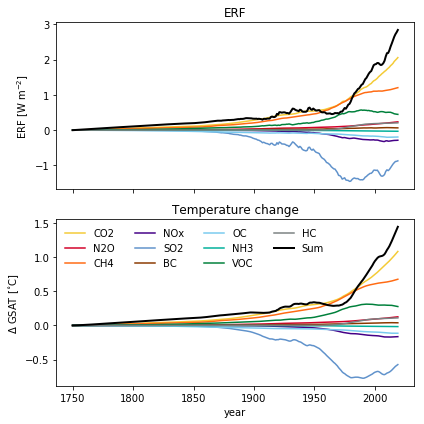

In [12]:
fig, axs = plt.subplots(2, sharex=True, figsize=[6,6])

ax_erf = axs[0]
ax_dT = axs[1]
for v in ds['variable'].values:
    ds.sel(variable=v)['Delta T'].plot(ax=ax_dT, label=v, c=cols[v])
    ds.sel(variable=v)['ERF'].plot(ax=ax_erf, c=cols[v])
ds.sum('variable')['Delta T'].plot(ax=ax_dT, label='Sum', c='k',linewidth=2)
ds.sum('variable')['ERF'].plot(ax=ax_erf, c='k',linewidth=2)
    
ax_dT.set_title('Temperature change')
ax_erf.set_title('ERF')
ax_erf.set_ylabel('ERF [W m$^{-2}$]')
ax_dT.set_ylabel('$\Delta$ GSAT [$^{\circ}$C]')
ax_erf.set_xlabel('')
ax_dT.legend(ncol=4, loc='upper left', frameon=False)
plt.tight_layout()
fig.savefig('hist_timeseries_ERF_dT.png', dpi=300)

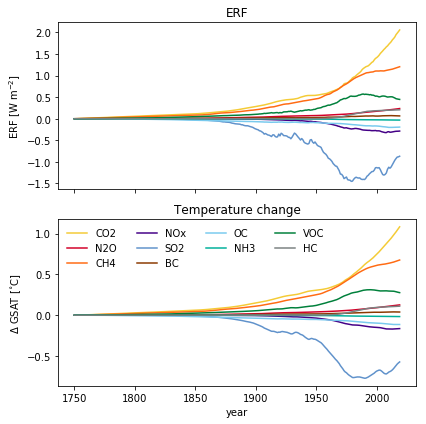

In [13]:
fig, axs = plt.subplots(2, sharex=True, figsize=[6,6])

ax_erf = axs[0]
ax_dT = axs[1]
for v in ds['variable'].values:
    ds.sel(variable=v)['Delta T'].plot(ax=ax_dT, label=v, c=cols[v])
    ds.sel(variable=v)['ERF'].plot(ax=ax_erf, c=cols[v])
ax_dT.set_title('Temperature change')
ax_erf.set_title('ERF')
ax_erf.set_ylabel('ERF [W m$^{-2}$]')
ax_dT.set_ylabel('$\Delta$ GSAT [$^{\circ}$C]')
ax_erf.set_xlabel('')
ax_dT.legend(ncol=4, loc='upper left', frameon=False)
plt.tight_layout()

Text(0,0.5,'$\\Delta$ T ($^\\circ$ C)')

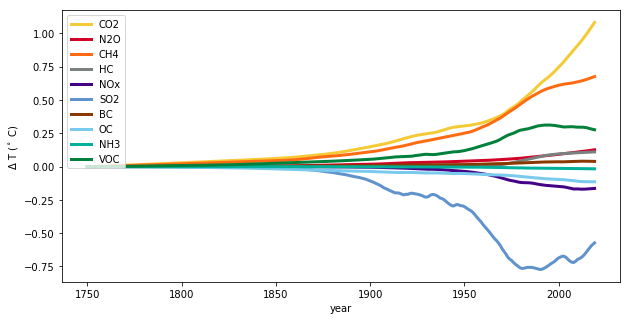

In [14]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']
fig, ax = plt.subplots(figsize=[10,5])
for v in variables_all:
    df_deltaT[variables_all][v].plot(linewidth=3,ax = ax, label=v, color=cols[v])#, color=cols.items())
plt.legend(loc='upper left')
plt.ylabel('$\Delta$ T ($^\circ$ C)')

In [15]:
col_list = [cols[c] for c in df_deltaT.columns]
col_list

[(0.5411764705882353, 0.2235294117647059, 0.0),
 (1.0, 0.4196078431372549, 0.07450980392156863),
 (0.9568627450980393, 0.796078431372549, 0.21176470588235294),
 (0.47843137254901963, 0.5058823529411764, 0.5058823529411764),
 (0.8274509803921568, 0.0, 0.1568627450980392),
 (0.0, 0.6901960784313725, 0.6039215686274509),
 (0.26666666666666666, 0.0, 0.5254901960784314),
 (0.4745098039215686, 0.792156862745098, 0.9333333333333333),
 (0.3764705882352941, 0.5725490196078431, 0.796078431372549),
 (0.0, 0.5019607843137255, 0.23137254901960785)]

In [17]:
import seaborn as sns

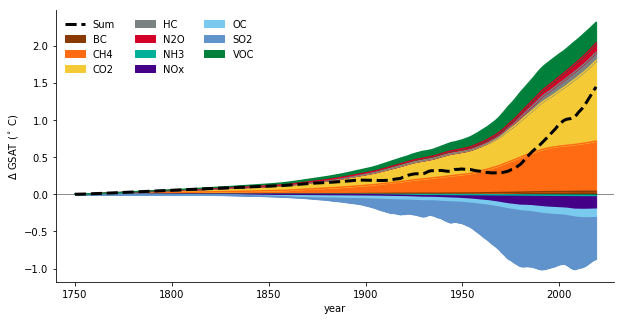

In [18]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']

fig, ax = plt.subplots(figsize=[10,5])
ax.hlines(0,1740,2028, linestyle='solid',alpha=0.9, color='k', linewidth=0.5)#.sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3)

df_deltaT.plot.area( color=col_list, ax=ax)
df_deltaT.sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3, label='Sum')
plt.legend(loc='upper left',ncol=3, frameon=False)
plt.ylabel('$\Delta$ GSAT ($^\circ$ C)')
ax.set_xlim([1740,2028])
sns.despine()

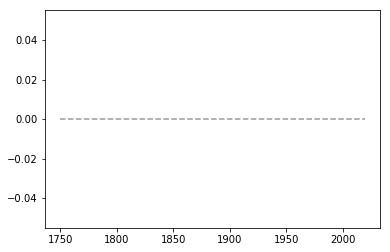

In [19]:
plt.hlines(0,1750,2019, linestyle='dashed',alpha=0.4, color='k')#.sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3)

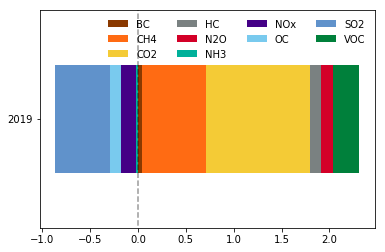

In [20]:
fig, ax = plt.subplots()
ax.vlines(0,-1,1, linestyle='dashed',alpha=0.4)
pd.DataFrame(df_deltaT.loc[2019]).transpose().plot.barh(stacked=True, color=col_list, ax=ax)
plt.legend(ncol=4, frameon=False)

In [21]:
import seaborn as sns

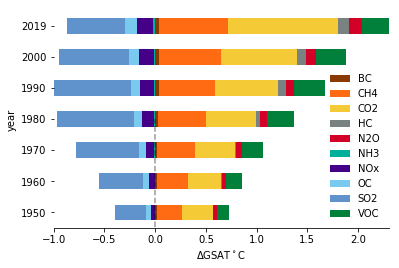

In [22]:
fig, ax = plt.subplots()
ax.vlines(0,-1,3, linestyle='dashed',alpha=0.4)

df_deltaT.loc[[1950,1960,1970,1980,1990,2000, 2019,]].plot.barh(stacked=True, color=col_list, ax=ax)
plt.legend(frameon=False)
sns.despine(fig, left=True)
ax.set_xlim([-1,2.3])
ax.set_xlabel('$\Delta$GSAT$^\circ$C')
plt.show()